<a href="https://colab.research.google.com/github/bhushanmandava/NeauralNetwork_Scratch/blob/main/neaural_network_from_scartch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cost before backpropagation: 0.8409721982151646
Cost after one update: 0.8396248736616997
Epoch 0: Cost = 0.8396
Epoch 20: Cost = 0.7129
Epoch 40: Cost = 0.6956
Epoch 60: Cost = 0.6934
Epoch 80: Cost = 0.6932


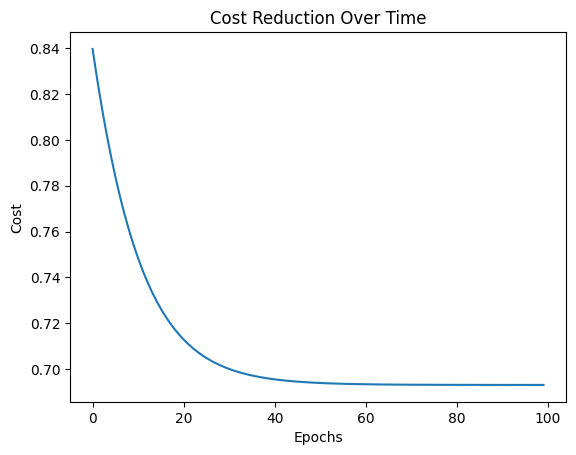

In [5]:
import numpy as np

# Network architecture
n = [2, 3, 3, 1]  # Input layer: 2, Hidden layer 1: 3, Hidden layer 2: 3, Output layer: 1
l = 3  # Number of layers
m = 10  # Number of training examples

# Initialize weights and biases
w1 = np.random.randn(n[1], n[0])
w2 = np.random.randn(n[2], n[1])
w3 = np.random.randn(n[3], n[2])
b1 = np.random.randn(n[1], 1)
b2 = np.random.randn(n[2], 1)
b3 = np.random.randn(n[3], 1)

def prep_data():
    x = np.array([
        [150, 70],
        [254, 73],
        [312, 68],
        [120, 60],
        [154, 61],
        [212, 65],
        [216, 67],
        [145, 67],
        [184, 64],
        [130, 69]
    ])
    y = np.array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0])
    y = y.reshape(1, 10)
    A0 = x.T
    return A0, y

def g(z):
    return 1 / (1 + np.exp(-1 * z))

def feed_forward(A0):
    z1 = w1 @ A0 + b1
    A1 = g(z1)
    z2 = w2 @ A1 + b2
    A2 = g(z2)
    z3 = w3 @ A2 + b3
    A3 = g(z3)
    cache = {
        'A0': A0,
        'A1': A1,
        'A2': A2,
        'A3': A3
    }
    return A3, cache

def cost(y_hat, y):
    losses = - ( (y * np.log(y_hat)) + (1 - y) * np.log(1 - y_hat) )
    m = y_hat.shape[1]
    cost = (1 / m) * np.sum(losses)
    return cost

A0, y = prep_data()

def back_prop_layer3(y_hat, y, A2, w3):
    A3 = y_hat
    m = y.shape[1]

    # dc_dw3 = dc_dA3 * dA3_dz3 * dz3_dw3
    dc_dz3 = (1 / m) * (A3 - y)
    assert dc_dz3.shape == (n[3], m)

    dz3_dw3 = A2.T
    dc_dw3 = dc_dz3 @ dz3_dw3
    assert dc_dw3.shape == w3.shape

    dc_db3 = np.sum(dc_dz3, axis=1, keepdims=True)
    assert dc_db3.shape == (n[3], 1)

    dz3_dA2 = w3
    dc_dA2 = w3.T @ dc_dz3
    assert dc_dA2.shape == (n[2], m)

    return dc_dw3, dc_db3, dc_dA2

def backprop_layer_2(propagator_dC_dA2, A1, A2, W2):
    dA2_dZ2 = A2 * (1 - A2)
    dC_dZ2 = propagator_dC_dA2 * dA2_dZ2
    assert dC_dZ2.shape == (W2.shape[0], A1.shape[1])

    dC_dW2 = dC_dZ2 @ A1.T
    assert dC_dW2.shape == W2.shape

    dC_db2 = np.sum(dC_dZ2, axis=1, keepdims=True)
    assert dC_db2.shape == (W2.shape[0], 1)

    dC_dA1 = W2.T @ dC_dZ2
    assert dC_dA1.shape == A1.shape

    return dC_dW2, dC_db2, dC_dA1

def backprop_layer_1(propagator_dC_dA1, A1, A0, W1):
    dA1_dZ1 = A1 * (1 - A1)
    dC_dZ1 = propagator_dC_dA1 * dA1_dZ1
    assert dC_dZ1.shape == (W1.shape[0], A0.shape[1])

    dC_dW1 = dC_dZ1 @ A0.T
    assert dC_dW1.shape == W1.shape

    dC_db1 = np.sum(dC_dZ1, axis=1, keepdims=True)
    assert dC_db1.shape == (W1.shape[0], 1)

    return dC_dW1, dC_db1

# Training loop (one iteration for demonstration)
A0, y = prep_data()
y_hat, cache = feed_forward(A0)
cost_val = cost(y_hat, y)
print("Cost before backpropagation:", cost_val)

# Backpropagation for all layers
dc_dw3, dc_db3, dc_dA2 = back_prop_layer3(y_hat, y, cache['A2'], w3)
dc_dw2, dc_db2, dc_dA1 = backprop_layer_2(dc_dA2, cache['A1'], cache['A2'], w2)
dc_dw1, dc_db1 = backprop_layer_1(dc_dA1, cache['A1'], cache['A0'], w1)

# Update weights and biases (using a simple gradient descent update rule)
learning_rate = 0.01
w3 -= learning_rate * dc_dw3
b3 -= learning_rate * dc_db3
w2 -= learning_rate * dc_dw2
b2 -= learning_rate * dc_db2
w1 -= learning_rate * dc_dw1
b1 -= learning_rate * dc_db1

# Recalculate cost after one update
y_hat, _ = feed_forward(A0)
new_cost = cost(y_hat, y)
print("Cost after one update:", new_cost)
def train():
    # Use global keyword to modify global weights and biases
    global w3, w2, w1, b3, b2, b1
    epochs = 100  # Training for 1000 iterations
    alpha = 0.1   # Learning rate
    costs = []    # List to store cost values

    for e in range(epochs):
        # 1. FEED FORWARD
        y_hat, cache = feed_forward(A0)

        # 2. COST CALCULATION
        error = cost(y_hat, y)
        costs.append(error)

        # 3. BACKPROP CALCULATIONS
        dC_dW3, dC_db3, dC_dA2 = back_prop_layer3(
            y_hat,
            y,
            A2=cache["A2"],
            w3=w3
        )
        dC_dW2, dC_db2, dC_dA1 = backprop_layer_2(
            propagator_dC_dA2=dC_dA2,
            A1=cache["A1"],
            A2=cache["A2"],
            W2=w2
        )
        dC_dW1, dC_db1 = backprop_layer_1(
            propagator_dC_dA1=dC_dA1,
            A1=cache["A1"],
            A0=cache["A0"],
            W1=w1
        )

        # 4. UPDATE WEIGHTS AND BIASES
        w3 = w3 - (alpha * dC_dW3)
        w2 = w2 - (alpha * dC_dW2)
        w1 = w1 - (alpha * dC_dW1)
        b3 = b3 - (alpha * dC_db3)
        b2 = b2 - (alpha * dC_db2)
        b1 = b1 - (alpha * dC_db1)

        # Logging progress every 20 epochs
        if e % 20 == 0:
            print(f"Epoch {e}: Cost = {error:.4f}")

    return costs

# Run the training function
costs = train()

# Plotting the cost function to see the training progress
import matplotlib.pyplot as plt

plt.plot(costs)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Time")
plt.show()

